<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 2nd exercise: <font color="#C70039">Work with Boxplots for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   01.11.2023
* Student: Ali Ünal

<img src="https://r-graph-gallery.com/img/other/boxplot_explanation.png" style="float: center;" width="800">
<img src="https://i2.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png?w=578" style="float: center;" width="800">


---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using boxplots to detect anomalies. Try to interpret the boxplot.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
4. take the three data sets from exercize 1 and create a boxplot for each of them
5. interpret the visual results and describe them
6. how can you test your data for being normally distributed?
-----------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy.stats import kstest
from scipy.stats import lognorm
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Load normalized Data for the first two Datasets
df_firstDataset = pd.read_csv("SOCR-HeightWeight.csv")['Height(Inches)']
df_secondDataset = pd.read_csv("SOCR-HeightWeight.csv")['Weight(Pounds)']

# Load not normalized Data for last Dataset
df_thirdDataset = pd.read_csv("incomeUS.csv")['Age']

<Axes: ylabel='Height(Inches)'>

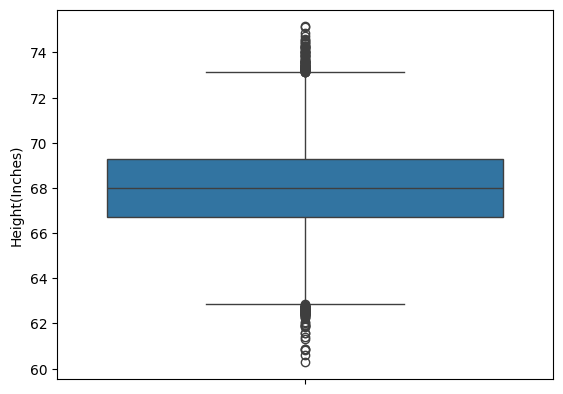

In [3]:
sns.boxplot(data=df_firstDataset)

In [ ]:
# you can the outliners behind the whiskers, here are the data from the height(inches) 63 and 73 are outliers

<AxesSubplot:>

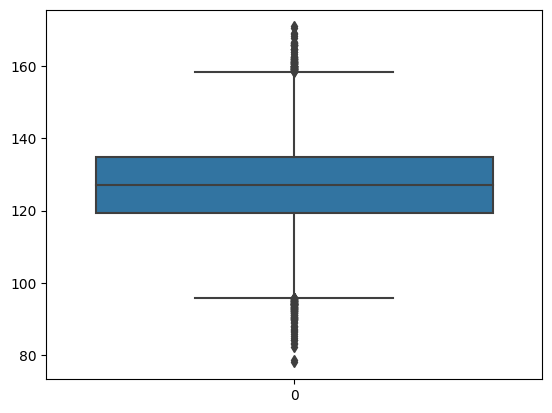

In [4]:
sns.boxplot(data=df_secondDataset)

In [ ]:
#all data points that are below 100 pounds and above 160 pounds are outliers, as it can be seen in the boxplot above

<AxesSubplot:>

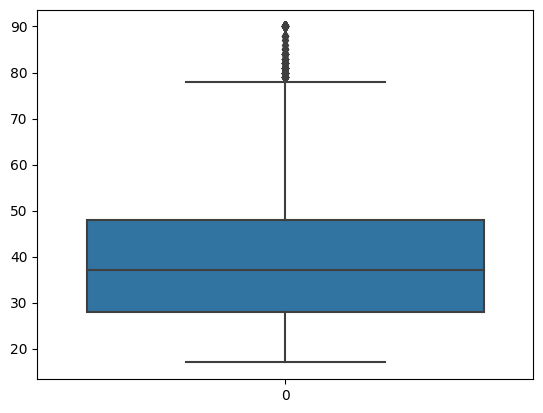

In [5]:
sns.boxplot(data=df_thirdDataset)

In [6]:
plt.show()

In [ ]:
#in the boxplot above only the people above the age of 80 are outliers

## Detecting Anomalies

In [ ]:
#You can visualize the data with a histogramm and if it doesnt have the form of a normalized data set it isnt normalized
# Method 1: Plot a histogram for the '?' column
# Method 2: Perform a shapiro wilk test
# perform Shapiro-Wilk test for normality
# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.
# Method 3: Create a Q-Q plot and look along the diagonal
# Method 4: Perform a Kolmogorov-Smirnov Test